# Data 102 Spring 2025 Lecture 4

***Note that this version of the notebook (unlike the version used in lecture) has the correct labels (FP/TP/FN/TN) on the p-value thresholding diagrams.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lec3 import show_p_values

%matplotlib inline

sns.set()  # This helps make our plots look nicer

# These make our figures bigger
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 100

## Multiple hypothesis testing and decisions

Suppose we have a collection of $p$-values, with ground truth labels.

In [2]:
p_values_orig = pd.read_csv('pvalues.csv')
p_values = p_values_orig.copy()
p_values.head()

,pvalue,is_alternative
0,0.226410,1
1,0.053205,1
2,0.001128,1
3,0.404488,1
4,0.401786,0


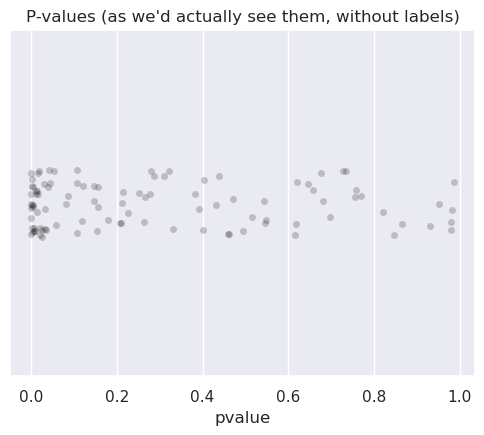

In [3]:
sns.stripplot(
    data=p_values, x='pvalue', color='black', alpha=0.2,
    #alpha = 0.8, order = [0, 1], orient = "h",
    #ax=ax
)
plt.title("P-values (as we'd actually see them, without labels)");

Text(0.5, 1.0, 'P-values, with ground truth labels')

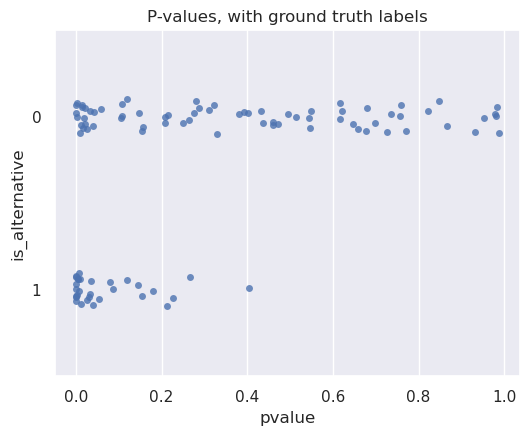

In [4]:
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], orient = "h"
)
plt.title('P-values, with ground truth labels')

***These labels are correct (unlike the ones shown live in lecture).***

In [5]:
p_values.shape

(100, 2)

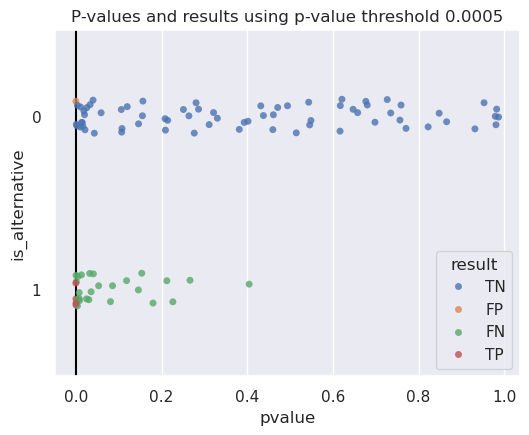

In [6]:
show_p_values(p_values, threshold=0.0005, show_labels=True)

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

In [8]:
p_values

,pvalue,is_alternative
0,0.226410,1
1,0.053205,1
2,0.001128,1
3,0.404488,1
4,0.401786,0
...,...,...
95,0.146346,0
96,0.003678,1
97,0.013303,0
98,0.493987,0


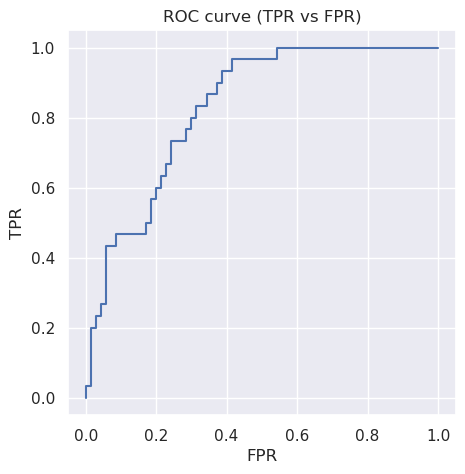

In [9]:
fpr, tpr, thresholds = roc_curve(p_values['is_alternative'], 1-p_values['pvalue'])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("ROC curve (TPR vs FPR)")
plt.show()